In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x_labels = ["deepPlace", "steiner", "waxman"]
y_data = [[6.541858141858142, 5.825674325674326, 4.710989010989011], 
          [7.537062937062937, 6.5410589410589415, 5.341058941058941], 
          [1.6374064353066977, 3.8149809160305344, 2.2600036879955745]]
solutionList = ["deepPlace", "steiner", "waxman"]

# Plotting settings
fig, ax = plt.subplots(figsize=(600/100, 350/100))  # Fig size in inches
width = 0.2  # Bar width
x = np.arange(len(x_labels))  # the label locations

for i, y in enumerate(y_data):
    rects = ax.bar(x + i*width - width, y, width, label=solutionList[i])

    # Annotate each bar
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Axis settings
ax.set_xlabel('Average channel success rate', fontsize=22)
ax.set_ylabel('Throughput (eps)', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend(loc='best', fontsize=14, ncol=1)

plt.xticks(rotation=0 if not False else 45, fontsize=22)
plt.yticks(fontsize=22)

plt.tight_layout()
if False:
    plt.grid(axis='y')
if False:
    plt.grid(axis='x')

# Save or show the plot

plt.show()


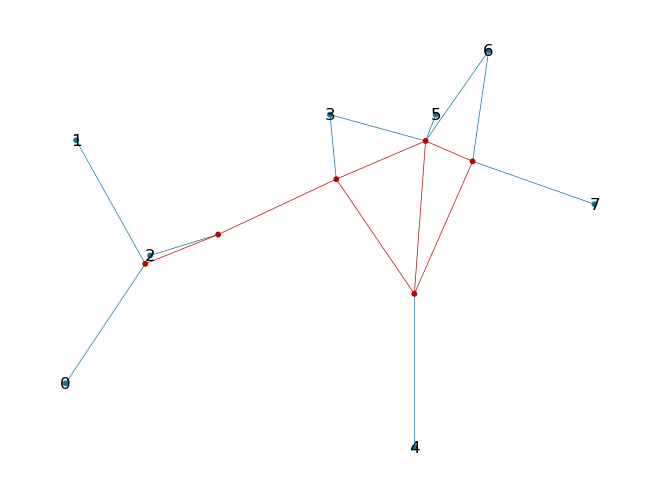

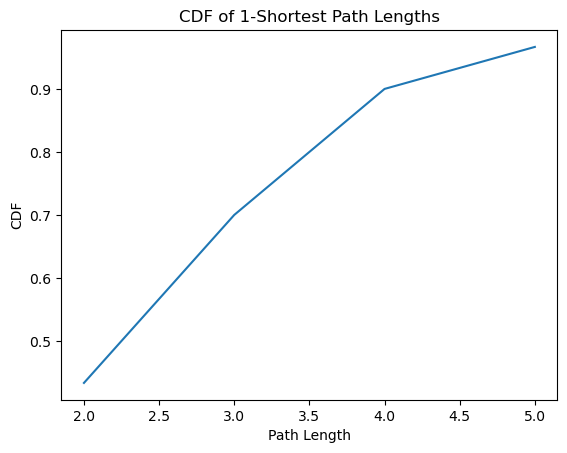

Average Path Length: 87.76578571041668
Standard Deviation of Path Lengths: 0.9732042112432566
Maximum Path Length: 5
Minimum Path Length: 2
Average Degree: 2.3333333333333335


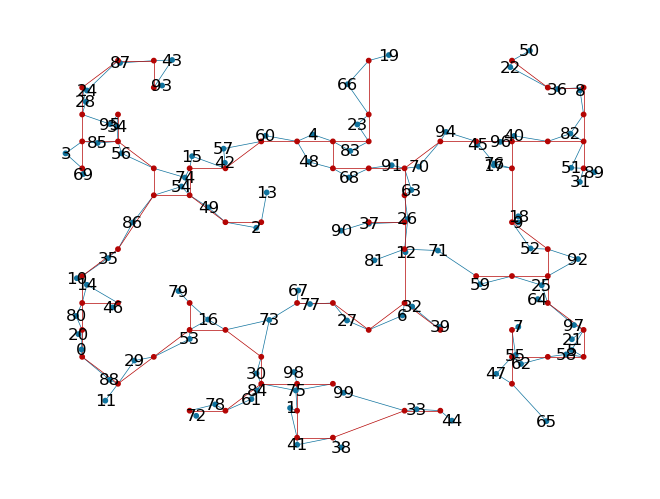

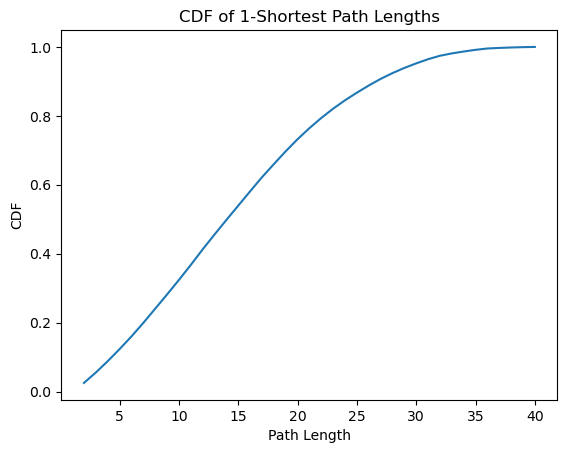

Average Path Length: 1116.0178124467657
Standard Deviation of Path Lengths: 8.258637453752248
Maximum Path Length: 40
Minimum Path Length: 2
Average Degree: 1.9746835443037976


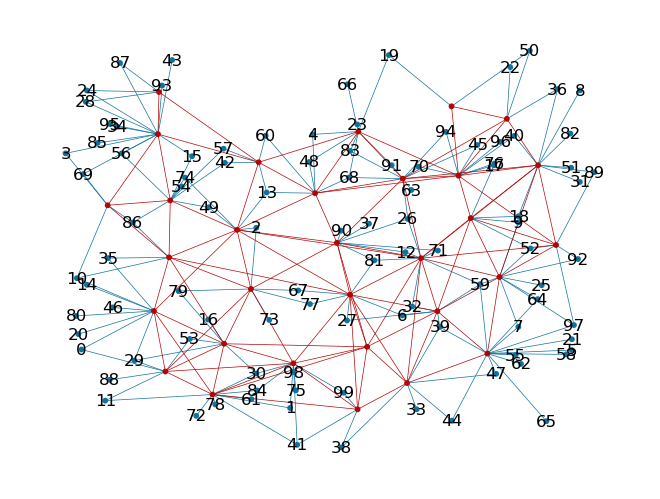

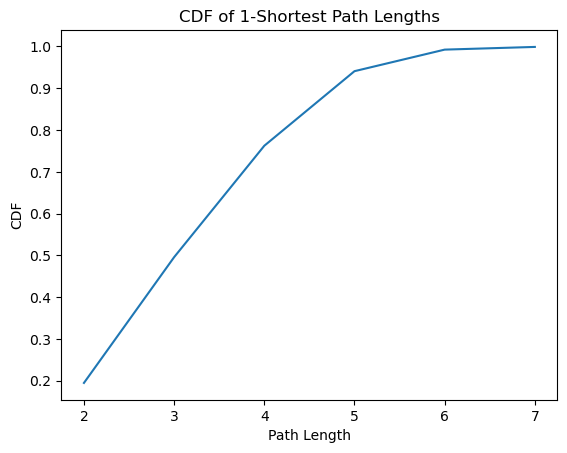

Average Path Length: 464.93569764055354
Standard Deviation of Path Lengths: 1.1726756240595266
Maximum Path Length: 7
Minimum Path Length: 2
Average Degree: 5.870967741935484


In [5]:
# from topo_failure import get_path_statistics
from topo_resilience_eval import get_path_statistics
from utils import graph_plot
import networkx as nx
import json

for i in  [0]:

  graph_file = '../dist/topos/deepPlace-8-' + str(i) +'.json'

  with open (graph_file, 'r') as f:
      graph = json.load(f)
      G = nx.node_link_graph(graph)

  graph_plot(G)
  get_path_statistics(G, 1)

for i in  [3]:

  graph_file = '../dist/topos/steiner-100-' + str(i) +'.json'

  with open (graph_file, 'r') as f:
      graph = json.load(f)
      G = nx.node_link_graph(graph)

  graph_plot(G)
  get_path_statistics(G, 1)

for i in  [3]:

  graph_file = '../dist/topos/waxman-100-' + str(i) +'.json'

  with open (graph_file, 'r') as f:
      graph = json.load(f)
      G = nx.node_link_graph(graph)

  graph_plot(G)
  get_path_statistics(G, 1)

In [ ]:
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size
from iter_kms_ga import KmsGa
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
from demand_gen import Demand
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")
from config import map_size
endnode_graph_gen_different_map_size(100, 0, map_size)
file_name = "../dist/endnodes/endnodesLocs-" + str(map_size) + "-100-0.json"
endnodes_files.append("../dist/endnodes/endnodesLocs-2000-100-0.json")


# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    d = Demand(f, 300)
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    kms = KmsGa(d)
    kms.iterate_kms_ga(f)
    # print ("kms ga generated")
    # construct_waxman(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)

['../dist/endnodes/us-top100.json']
Number of nodes in G: 325


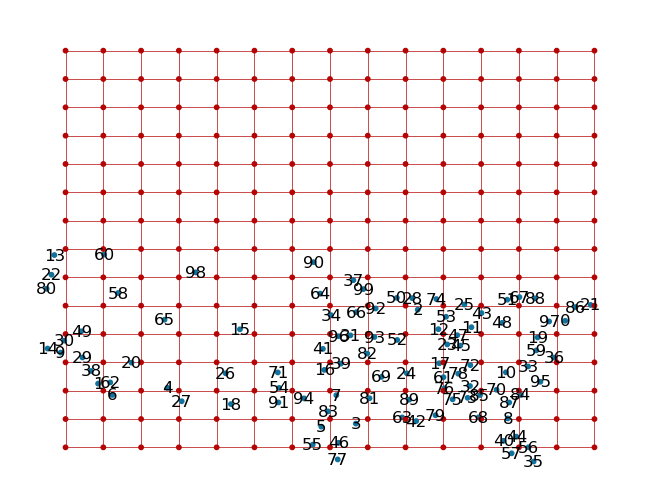

New reapters number: 225
max edge distance: 333.33333333333394
max endnode-repeater edge: 0
max repeater-repeater edge: 333.33333333333394
Distance Sum: 139999.9999999995
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


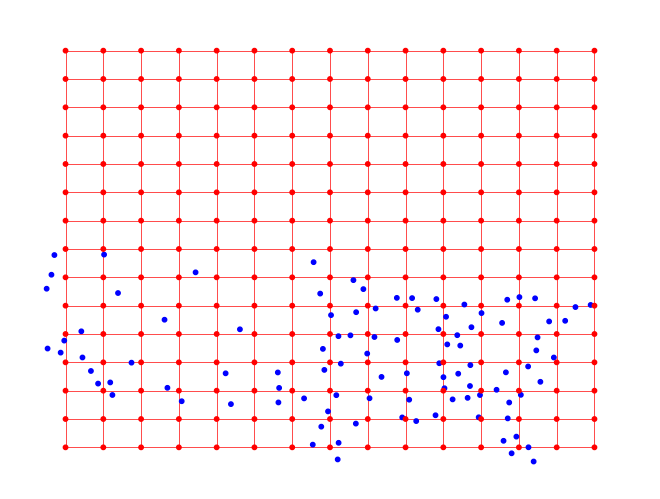

New reapters number: 78
max edge distance: 333.33333333333394
max endnode-repeater edge: 0
max repeater-repeater edge: 333.33333333333394
Distance Sum: 45000.00000000004
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


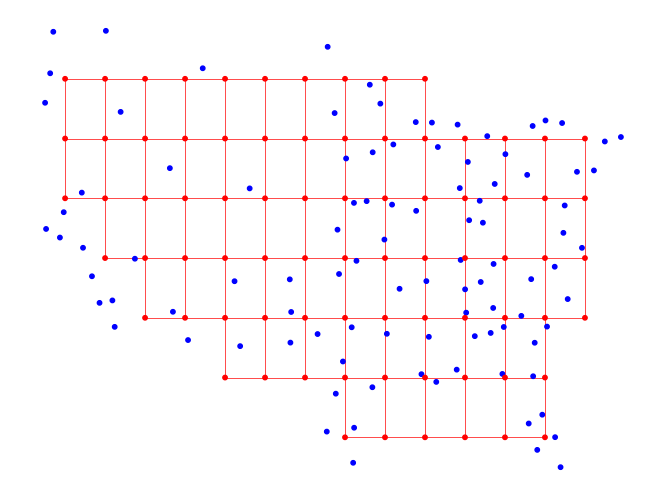

number of nodes in the graph: 178


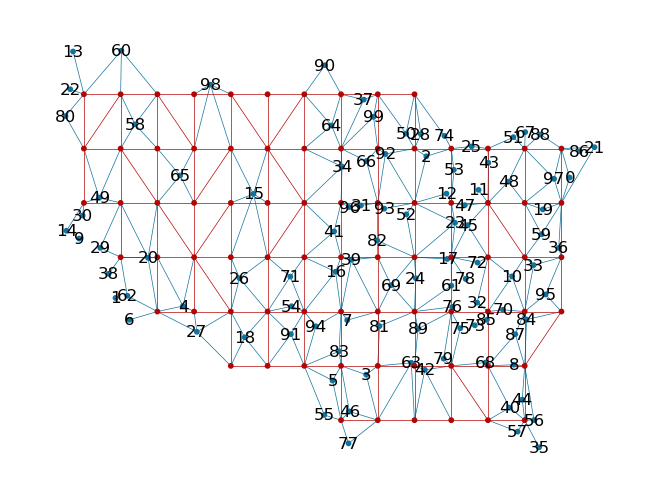

After do Delaunay Triangulation for all repeater nodes:


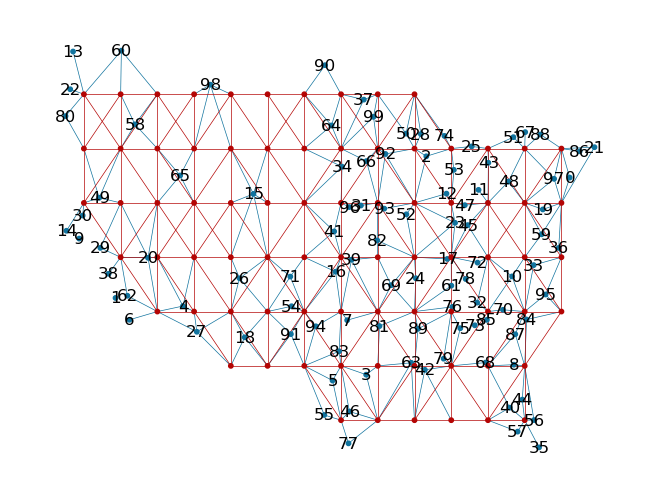

endnode not connected to any repeater
endnode not connected to any repeater
endnode not connected to any repeater


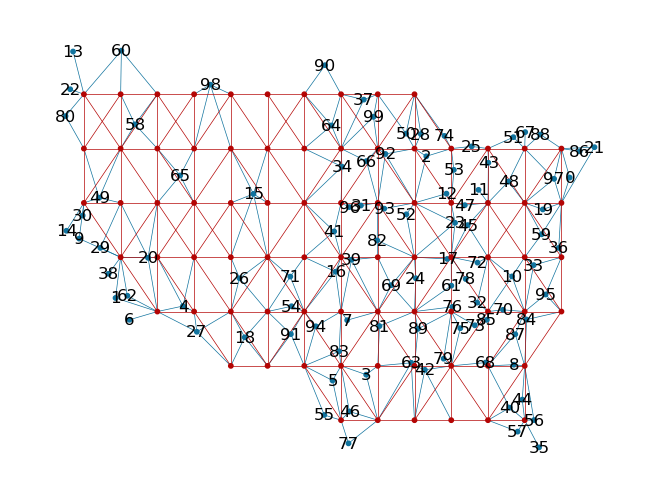

it works for min_repeaters_num_temp: 78
Diameter: 14
Average hop count: 5.369300382875044
Average degree: 5.070588235294117
Average degree of repeaters: 8.771428571428572
Average degree of repeaters edges: 2.6142857142857143
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
New reapters number: 70
max edge distance: 530.1895886795085
max endnode-repeater edge: 498.61093952200815
max repeater-repeater edge: 530.1895886795085
Distance Sum: 126792.47148805646
The number of illegal e-r edges: 0
The number of illegal r-r edges: 1


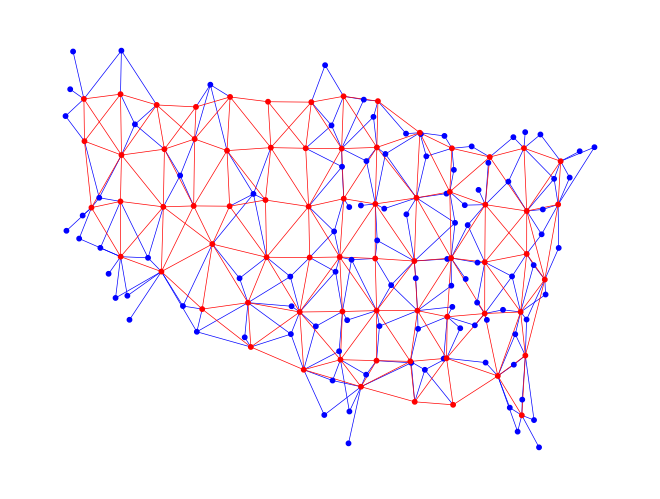

for fine granularity, min_repeaters_num_temp: 70
The number of repeaters in start graph: 78
The number of endnodes in start graph: 100


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


num_clusters: 77


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 77
max edge distance: 499.882247181329
max endnode-repeater edge: 499.8337245331097
max repeater-repeater edge: 499.882247181329
Distance Sum: 122819.5215494661
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


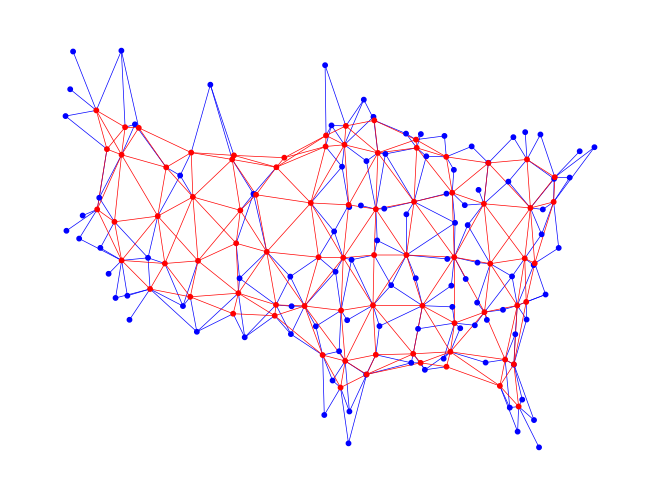

Diameter: 15
Average hop count: 5.635721623009759
Average degree: 5.186440677966102
Average degree of repeaters: 8.571428571428571
Average degree of repeaters edges: 2.6103896103896105
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 73


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 73
max edge distance: 499.9726611932724
max endnode-repeater edge: 499.81157635946585
max repeater-repeater edge: 499.9726611932724
Distance Sum: 118067.95144816229
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


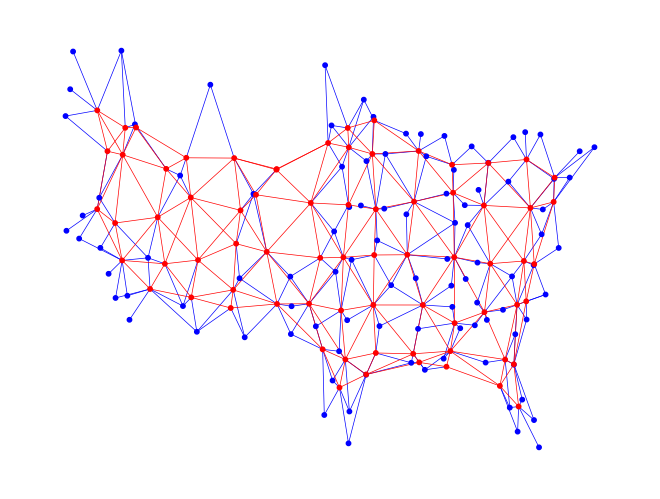

Diameter: 15
Average hop count: 5.655733297486221
Average degree: 5.086705202312139
Average degree of repeaters: 8.602739726027398
Average degree of repeaters edges: 2.5753424657534247
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 69


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 69
max edge distance: 499.9981928531402
max endnode-repeater edge: 499.93654691187135
max repeater-repeater edge: 499.9981928531402
Distance Sum: 114444.36774530898
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


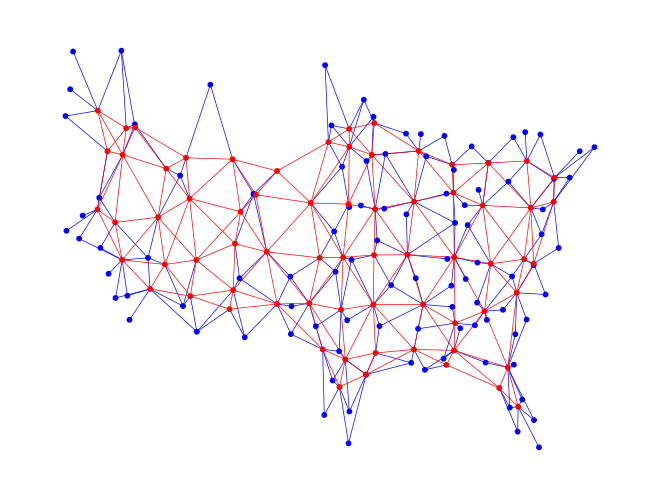

Diameter: 15
Average hop count: 5.628134685826994
Average degree: 4.994082840236686
Average degree of repeaters: 8.666666666666666
Average degree of repeaters edges: 2.550724637681159
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 65


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 65
max edge distance: 499.9315169155147
max endnode-repeater edge: 499.86747165467546
max repeater-repeater edge: 499.9315169155147
Distance Sum: 111010.23715357557
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


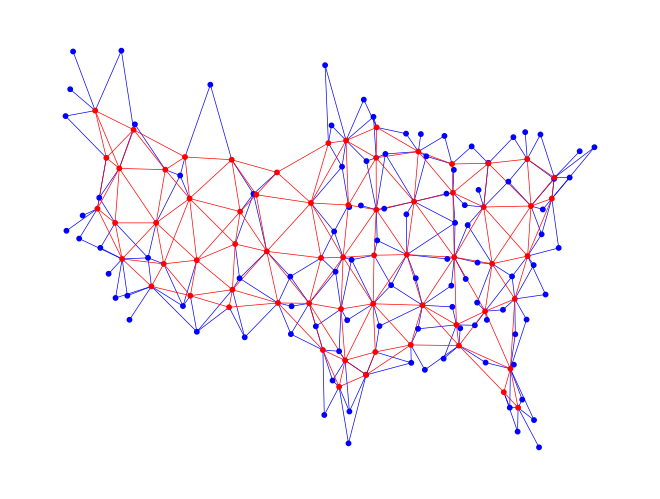

Diameter: 15
Average hop count: 5.566666666666666
Average degree: 4.909090909090909
Average degree of repeaters: 8.76923076923077
Average degree of repeaters edges: 2.5384615384615383
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 61


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 61
max edge distance: 499.9886903844237
max endnode-repeater edge: 499.9886903844237
max repeater-repeater edge: 499.96529243755236
Distance Sum: 106617.19710305231
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


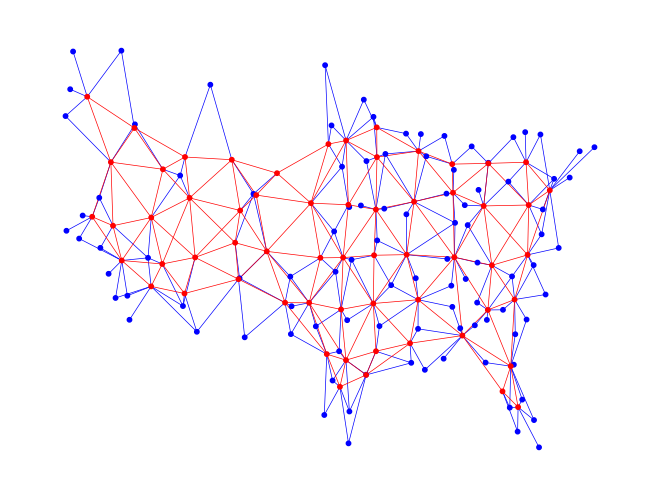

Diameter: 15
Average hop count: 5.528416149068323
Average degree: 4.782608695652174
Average degree of repeaters: 8.819672131147541
Average degree of repeaters edges: 2.5081967213114753
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 57


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 57
max edge distance: 499.96529243755236
max endnode-repeater edge: 499.8399991344482
max repeater-repeater edge: 499.96529243755236
Distance Sum: 103321.84777319978
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


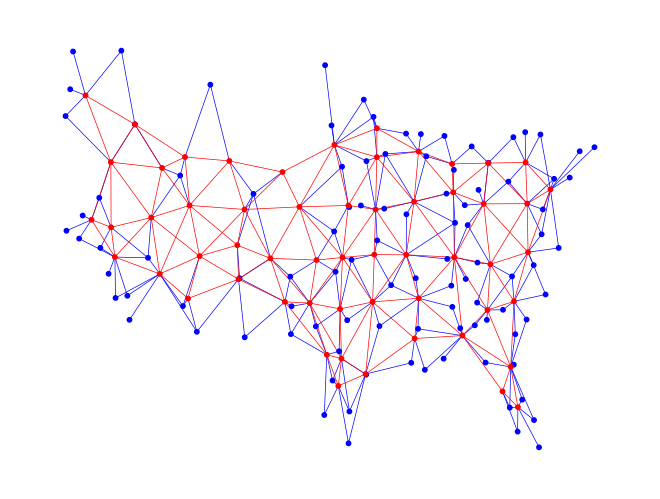

Diameter: 14
Average hop count: 5.316184876694431
Average degree: 4.662420382165605
Average degree of repeaters: 8.912280701754385
Average degree of repeaters edges: 2.491228070175439
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 2
current rate:  4
num_clusters: 53


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 53
max edge distance: 531.2772801034869
max endnode-repeater edge: 499.9865281290103
max repeater-repeater edge: 531.2772801034869
Distance Sum: 100080.0569329117
The number of illegal e-r edges: 0
The number of illegal r-r edges: 1


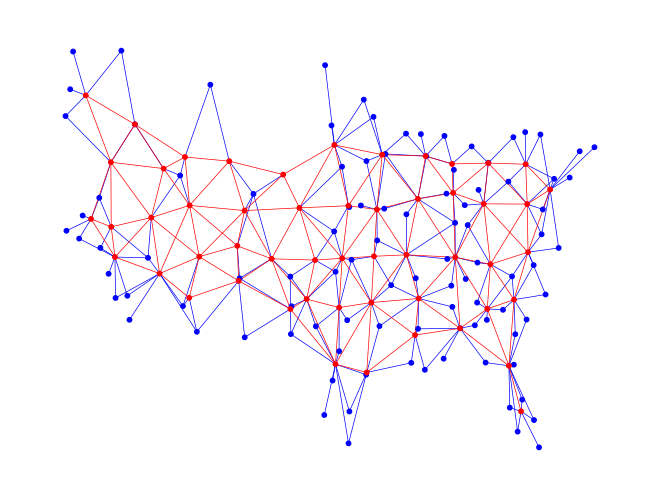

Diameter: 14
Average hop count: 5.284829721362229
Average degree: 4.549019607843137
Average degree of repeaters: 9.037735849056604
Average degree of repeaters edges: 2.4716981132075473
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 49


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 49
max edge distance: 579.5036591340184
max endnode-repeater edge: 541.9314666862537
max repeater-repeater edge: 579.5036591340184
Distance Sum: 96847.61972643874
The number of illegal e-r edges: 2
The number of illegal r-r edges: 1


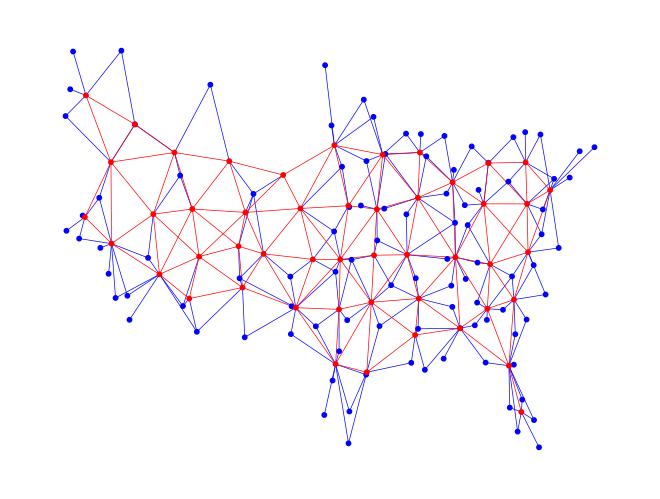

Diameter: 13
Average hop count: 5.207418828224197
Average degree: 4.416107382550336
Average degree of repeaters: 9.142857142857142
Average degree of repeaters edges: 2.4285714285714284
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 45


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

In [1]:
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size
from iter_kms_ga import KmsGa
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
from demand_gen import Demand
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")
from config import map_size
endnode_graph_gen_different_map_size(100, 0, map_size)
file_name = "us-top100.json"
endnodes_files.append("../dist/endnodes/us-top100.json")
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")


# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    d = Demand(f, 300)
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    kms = KmsGa(d)
    kms.iterate_kms_ga(f)
    # print ("kms ga generated")
    # construct_waxman(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)

['../dist/endnodes/us-top100.json']
Number of nodes in G: 389


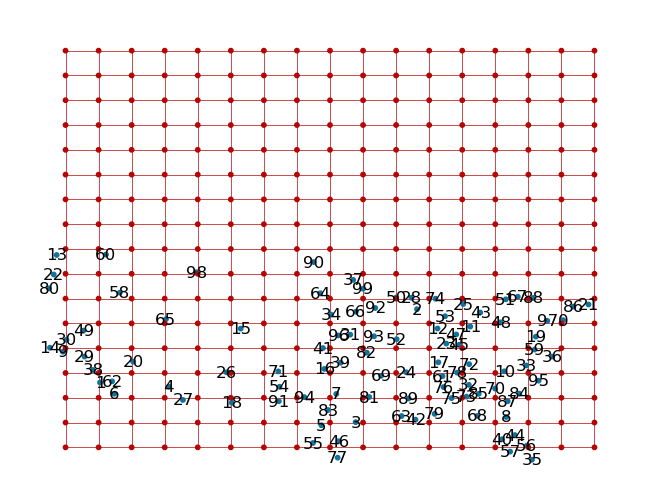

New reapters number: 289
max edge distance: 294.1176470588239
max endnode-repeater edge: 0
max repeater-repeater edge: 294.1176470588239
Distance Sum: 160000.00000000081
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


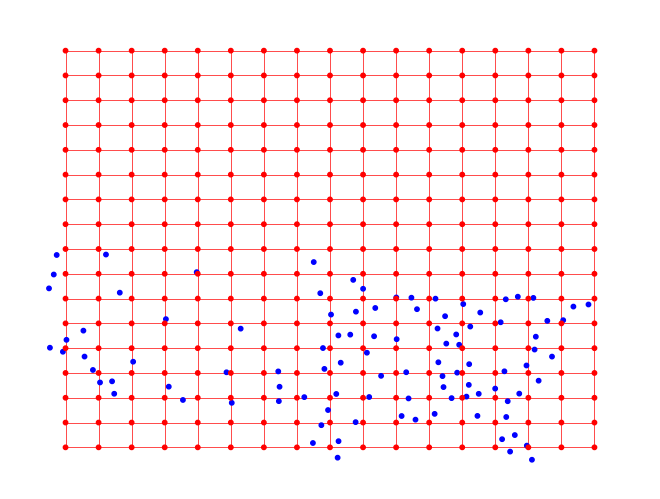

concave hull: [21 90 60 13 80 14  6 77 35]
New reapters number: 102
max edge distance: 294.1176470588239
max endnode-repeater edge: 0
max repeater-repeater edge: 294.1176470588239
Distance Sum: 52941.17647058844
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


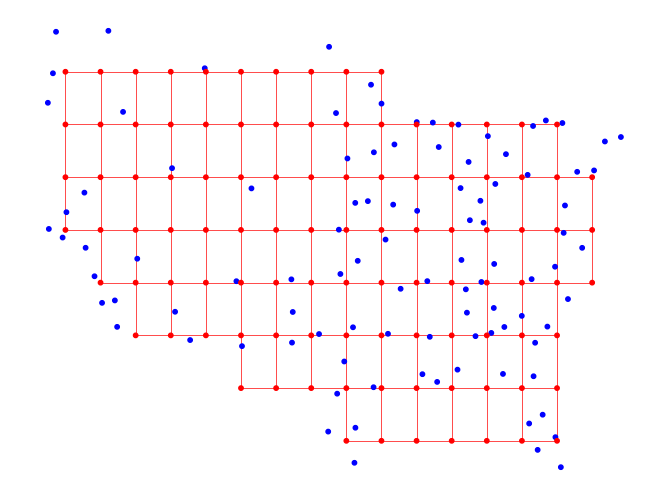

number of nodes in the graph: 202
endnode not connected to any repeater


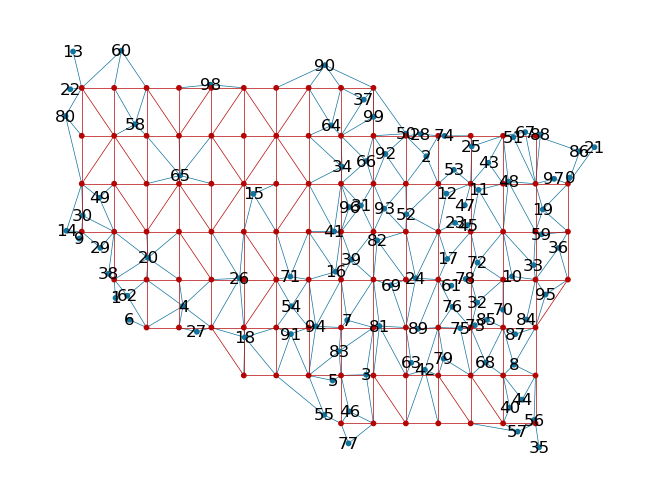

it works for min_repeaters_num_temp: 102
New reapters number: 94
max edge distance: 490.41285083239615
max endnode-repeater edge: 478.71006809693745
max repeater-repeater edge: 490.41285083239615
Distance Sum: 127221.19880875028
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


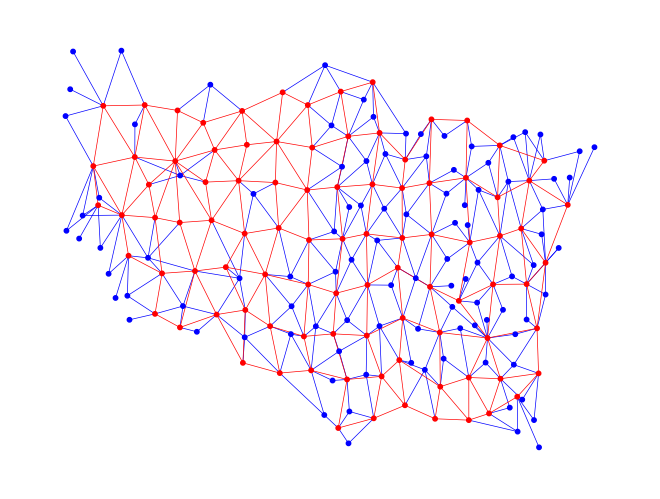

for fine granularity, min_repeaters_num_temp: 94
it works for min_repeaters_num_temp: 94


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 86
max edge distance: 499.54047216777957
max endnode-repeater edge: 477.8056111910281
max repeater-repeater edge: 499.54047216777957
Distance Sum: 125465.97946633816
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


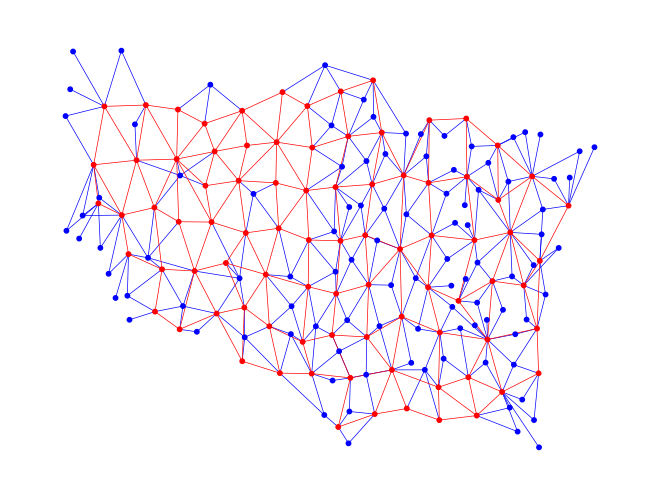

for fine granularity, min_repeaters_num_temp: 86
it works for min_repeaters_num_temp: 86


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 78
max edge distance: 485.2188897464376
max endnode-repeater edge: 477.31642338584004
max repeater-repeater edge: 485.2188897464376
Distance Sum: 121815.11010605066
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


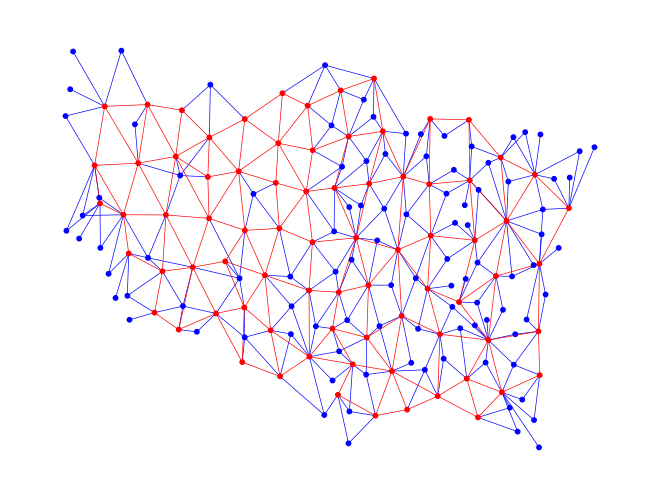

for fine granularity, min_repeaters_num_temp: 78
it works for min_repeaters_num_temp: 78


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 70
max edge distance: 609.7211982105778
max endnode-repeater edge: 609.7211982105778
max repeater-repeater edge: 500.9918318575392
Distance Sum: 118847.25381360968
The number of illegal e-r edges: 2
The number of illegal r-r edges: 2


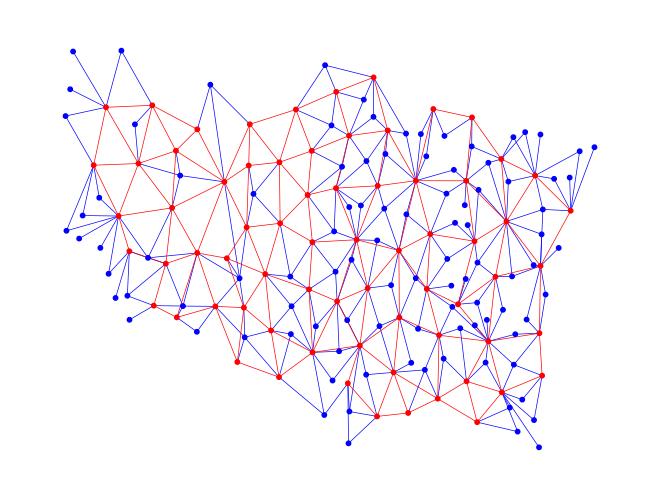

for fine granularity, min_repeaters_num_temp: 70
The number of repeaters in start graph: 78
The number of endnodes in start graph: 100
num_clusters: 77


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 77
max edge distance: 478.92950161812234
max endnode-repeater edge: 474.8127897767166
max repeater-repeater edge: 478.92950161812234
Distance Sum: 121793.65393306747
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


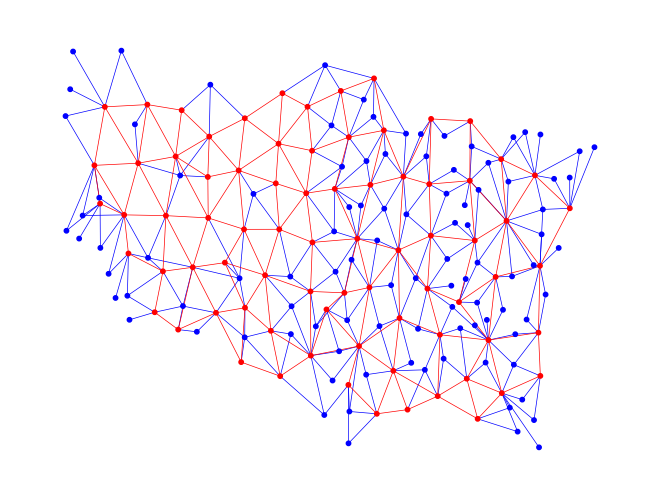

num_clusters: 74


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 74
max edge distance: 496.89692889705736
max endnode-repeater edge: 476.2011200681061
max repeater-repeater edge: 496.89692889705736
Distance Sum: 121228.35258068155
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


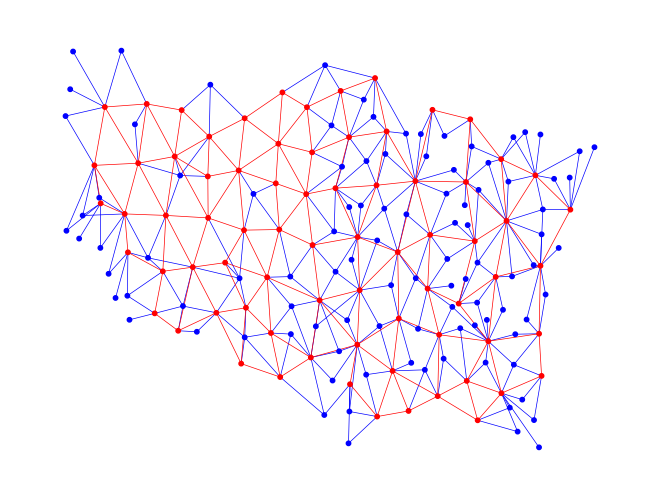

num_clusters: 71


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 71
max edge distance: 495.89777573481786
max endnode-repeater edge: 484.37142808184757
max repeater-repeater edge: 495.89777573481786
Distance Sum: 120662.86534003694
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


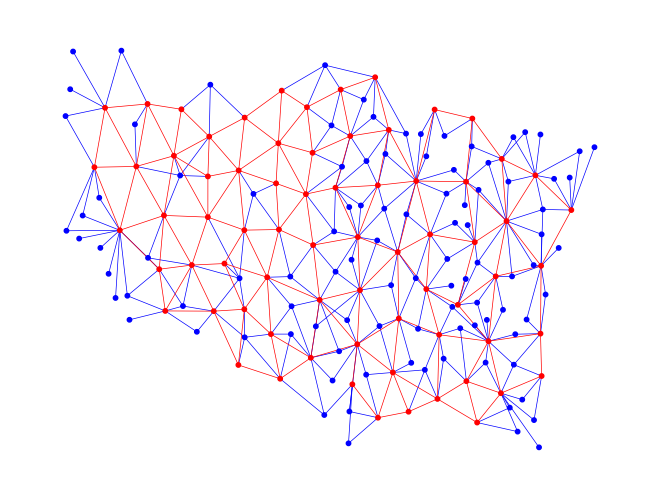

num_clusters: 68


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 68
max edge distance: 609.4916254627403
max endnode-repeater edge: 609.4916254627403
max repeater-repeater edge: 500.6714088105786
Distance Sum: 119591.7116794725
The number of illegal e-r edges: 2
The number of illegal r-r edges: 1


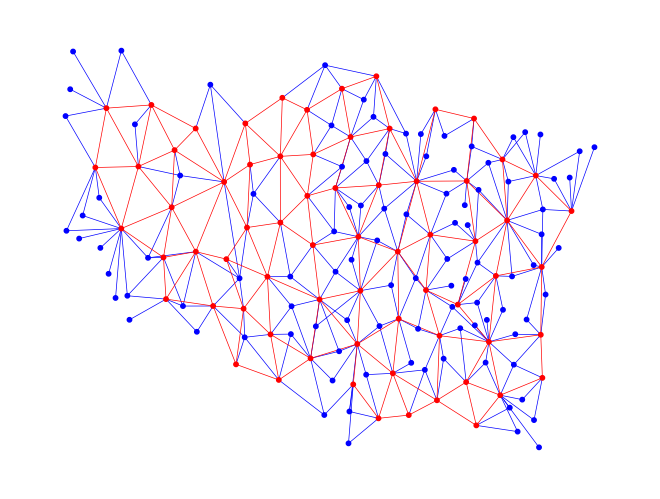

num_clusters: 65


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 65
max edge distance: 608.9195327232055
max endnode-repeater edge: 608.9195327232055
max repeater-repeater edge: 500.4354670595187
Distance Sum: 117487.68106594025
The number of illegal e-r edges: 2
The number of illegal r-r edges: 1


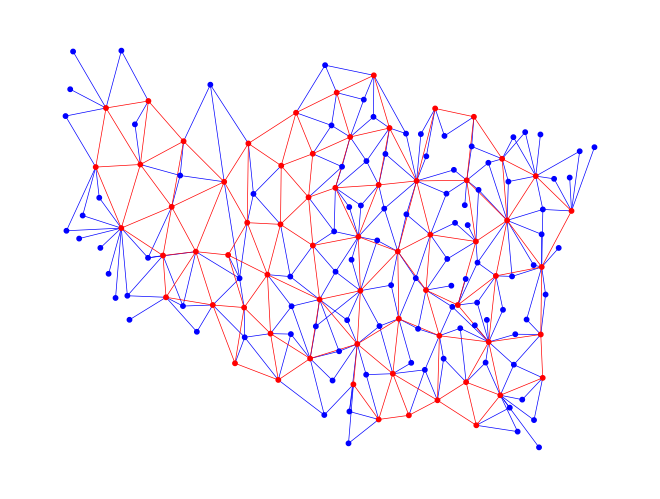

num_clusters: 62


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 62
max edge distance: 609.087717133513
max endnode-repeater edge: 609.087717133513
max repeater-repeater edge: 500.38273606108436
Distance Sum: 117559.56055694923
The number of illegal e-r edges: 3
The number of illegal r-r edges: 1


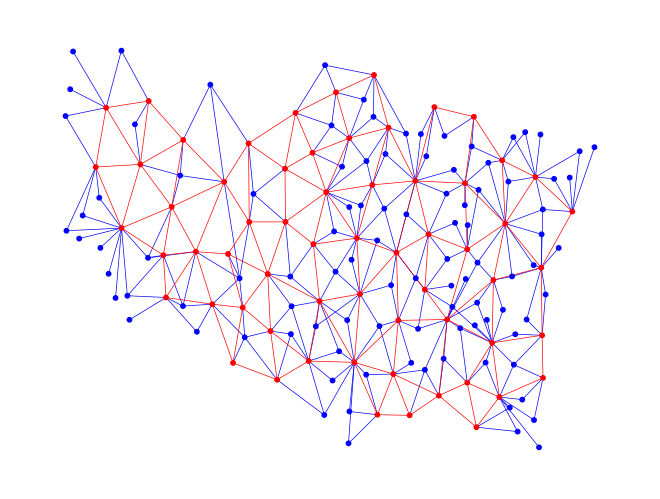

num_clusters: 59


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 59
max edge distance: 608.6684596887736
max endnode-repeater edge: 608.6684596887736
max repeater-repeater edge: 500.8458443731592
Distance Sum: 116667.96458781809
The number of illegal e-r edges: 5
The number of illegal r-r edges: 1


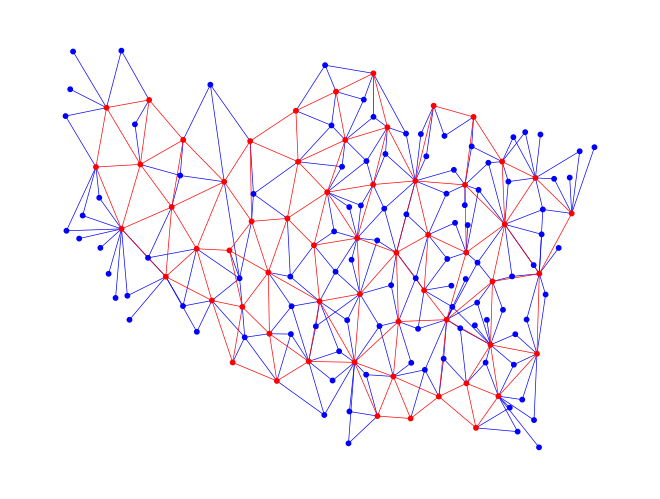

num_clusters: 56


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 56
max edge distance: 609.0924809750755
max endnode-repeater edge: 609.0924809750755
max repeater-repeater edge: 500.3696350115075
Distance Sum: 116192.79200711053
The number of illegal e-r edges: 4
The number of illegal r-r edges: 1


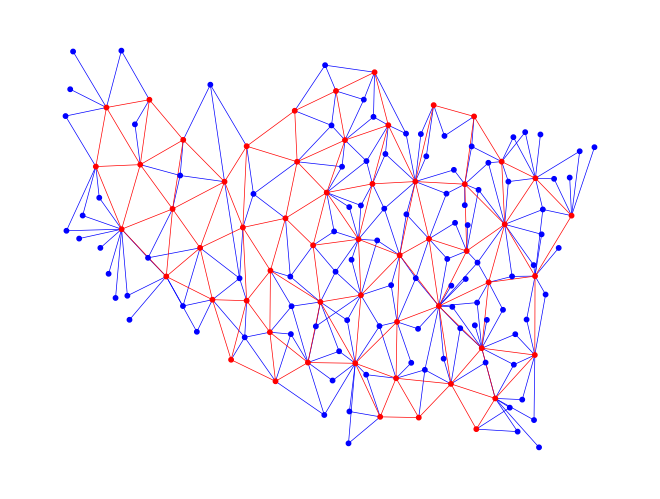

IndexError: list index out of range

In [1]:
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size
from iter_kms_ga import KmsGa
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
from demand_gen import Demand
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")
from config import map_size, abs_file_path
endnode_graph_gen_different_map_size(100, 0, map_size)
file_name = "us-top100.json"
endnodes_files.append(abs_file_path + "/dist/endnodes/us-top100.json")
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")


# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    d = Demand(f, 300)
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    kms = KmsGa(d)
    kms.iterate_kms_ga(f)
    # print ("kms ga generated")
    # construct_waxman(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)

The result for L = 200 is: 0.5898534310686913
The result for L = 100 is: 0.9999999999895965
The result for L = 125 is: 0.9999817622624746
The result for L = 150 is: 0.9911533903271528
The result for L = 175 is: 0.8715111979190219
The result for L = 200 is: 0.5898534310686913
The result for L = 250 is: 0.1548767384155295
The result for L = 300 is: 0.03128076460168505
The result for L = 350 is: 0.005984496521909244
The result for L = 400 is: 0.0011330759813167335
The result for L = 500 is: 4.044342258457956e-05


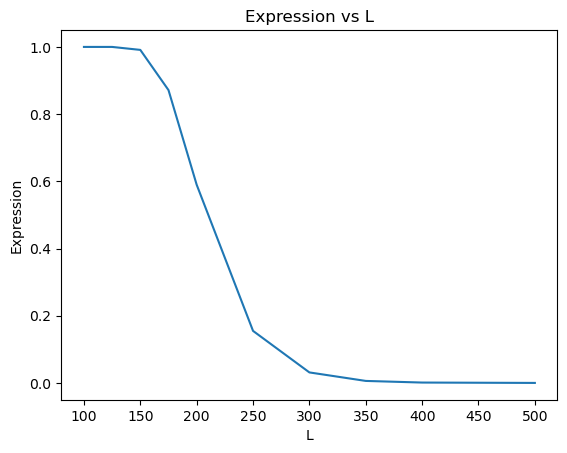

In [3]:
import numpy as np

# Define the variables
M = 1000
L_att = 15

# Define the function
def calculate_expression(L):
    single_succ = 1 - (1 - (0.7) * np.exp(-L / (2*L_att))) ** M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

def calculate_expression2(L):
    single_succ = 1 - (1 - (0.7) * np.exp(-L / L_att))  * M
    all_failed = (1 - single_succ) ** 1
    # return 1 - (1 - (1/1) * np.exp(-L / L_att)) ** M
    return 1 - all_failed

# Calculate the value for a specific L
L = 200  # Example value for L, change as needed
result = calculate_expression(L)

# Print the result
print(f"The result for L = {L} is: {result}")

# plot a figure with L = [100, 200, 300, 400, 500]
import matplotlib.pyplot as plt
Ls = [100, 125, 150, 175, 200, 250, 300, 350, 400, 500]
res = []
res2 = []
for L in Ls:
    res.append(calculate_expression(L))
    res2.append(calculate_expression2(L))
    print (f"The result for L = {L} is: {res[-1]}")

data_labels = [r for r in res]
plt.plot(Ls, res)
# plt.plot(Ls, res2)
plt.xlabel('L')
plt.ylabel('Expression')
plt.title('Expression vs L')
plt.show()


['../dist/endnodes/ustop100-100-0.json']
Number of nodes in G: 389


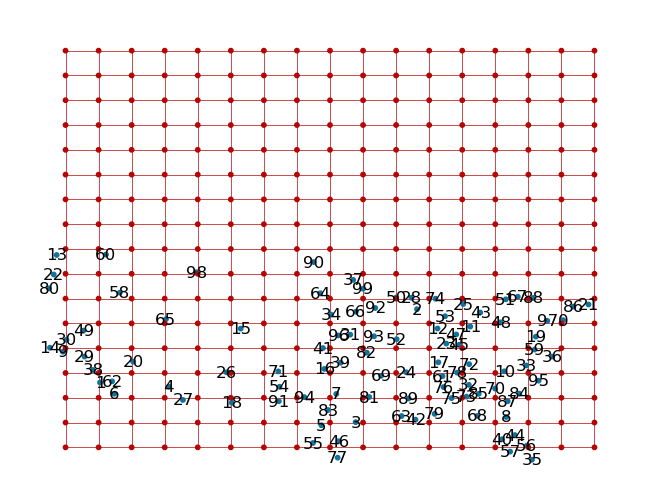

New reapters number: 289
max edge distance: 294.1176470588239
max endnode-repeater edge: 0
max repeater-repeater edge: 294.1176470588239
Distance Sum: 160000.00000000081
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


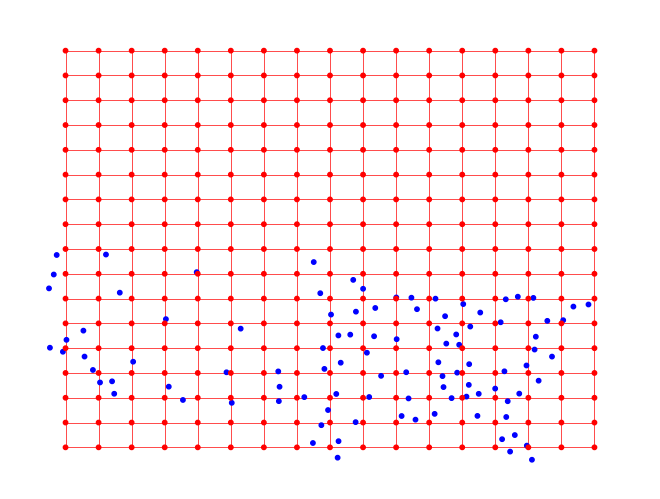

New reapters number: 102
max edge distance: 294.1176470588239
max endnode-repeater edge: 0
max repeater-repeater edge: 294.1176470588239
Distance Sum: 52941.17647058844
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


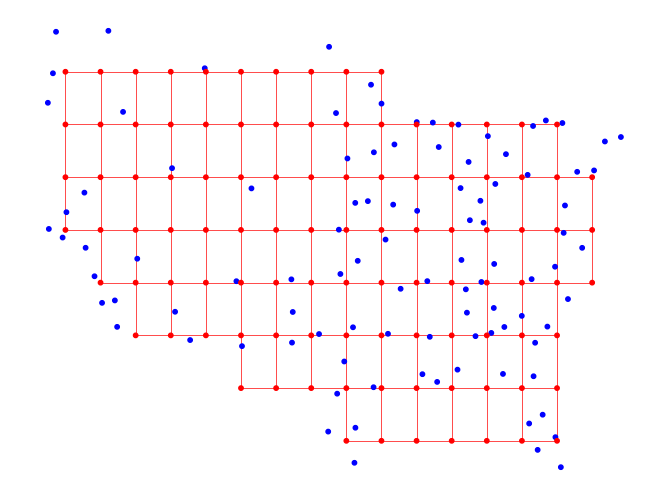

number of nodes in the graph: 202


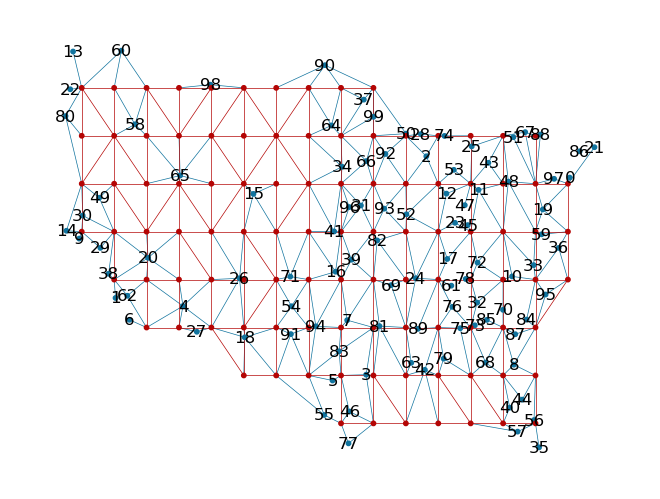

After do Delaunay Triangulation for all repeater nodes:


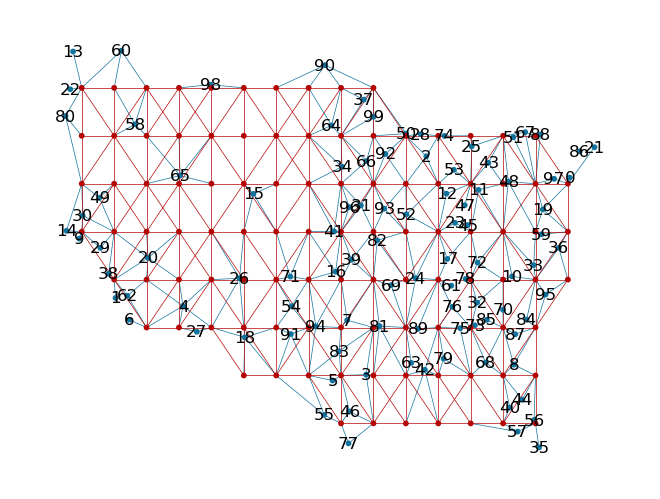

endnode not connected to any repeater


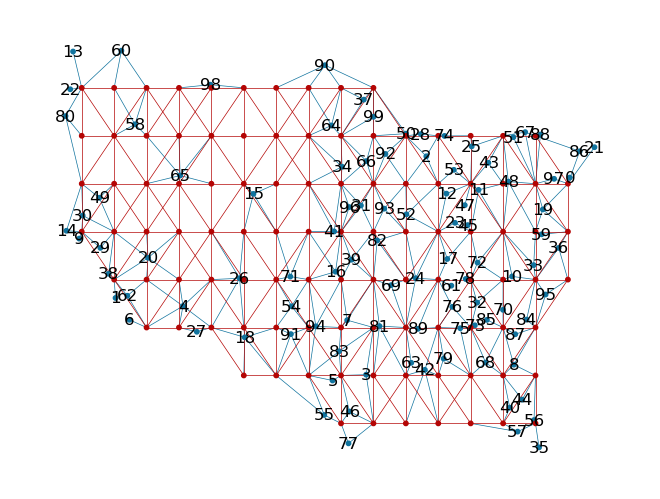

it works for min_repeaters_num_temp: 102


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Diameter: 16
Average hop count: 5.859088723892954
Average degree: 5.587628865979381
Average degree of repeaters: 8.446808510638299
Average degree of repeaters edges: 2.6808510638297873
Maximum degree of repeater edges: 10
Minimum degree of repeater edges: 2
New reapters number: 94
max edge distance: 499.49742918815684
max endnode-repeater edge: 499.49742918815684
max repeater-repeater edge: 499.4403069081547
Distance Sum: 141351.36500971083
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


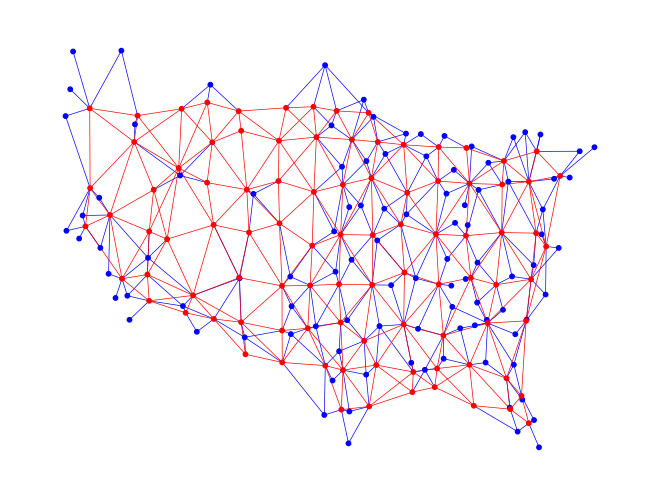

for fine granularity, min_repeaters_num_temp: 94
it works for min_repeaters_num_temp: 94


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Diameter: 16
Average hop count: 5.823539668700959
Average degree: 5.451612903225806
Average degree of repeaters: 8.523255813953488
Average degree of repeaters edges: 2.627906976744186
Maximum degree of repeater edges: 10
Minimum degree of repeater edges: 1
New reapters number: 86
max edge distance: 499.57327554270626
max endnode-repeater edge: 499.1214318569277
max repeater-repeater edge: 499.57327554270626
Distance Sum: 130547.31014439357
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


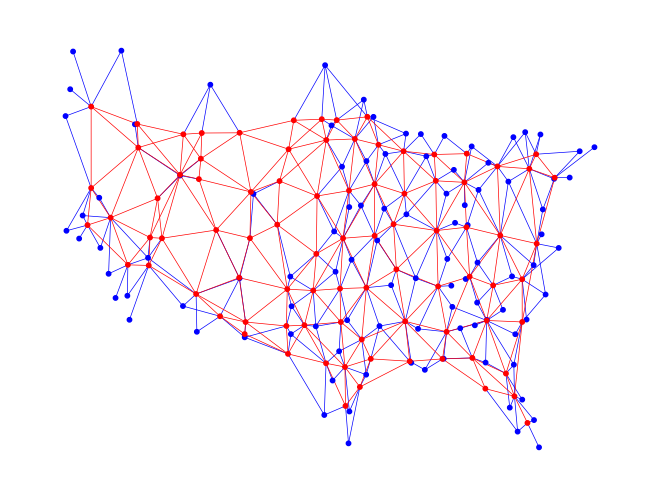

for fine granularity, min_repeaters_num_temp: 86
it works for min_repeaters_num_temp: 86


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Diameter: 15
Average hop count: 5.748301910747159
Average degree: 5.280898876404494
Average degree of repeaters: 8.58974358974359
Average degree of repeaters edges: 2.5641025641025643
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
New reapters number: 78
max edge distance: 532.681255265873
max endnode-repeater edge: 532.681255265873
max repeater-repeater edge: 499.85036836155473
Distance Sum: 122673.46675585103
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


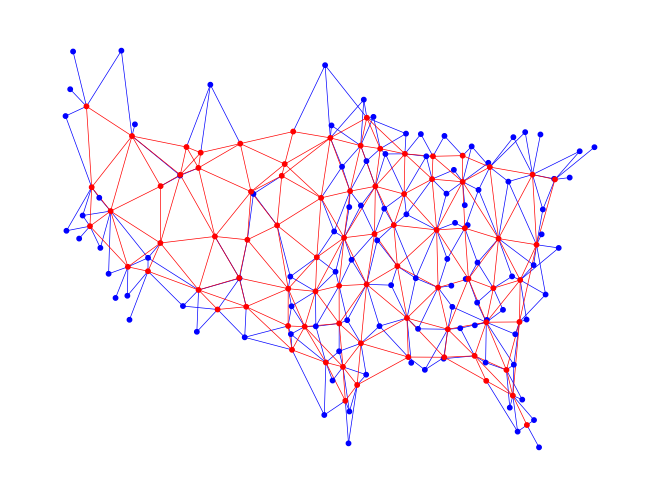

for fine granularity, min_repeaters_num_temp: 78
The number of repeaters in start graph: 86
The number of endnodes in start graph: 100
num_clusters: 85


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 85
max edge distance: 499.9210628912356
max endnode-repeater edge: 499.9210628912356
max repeater-repeater edge: 499.890320082686
Distance Sum: 128767.20042823313
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


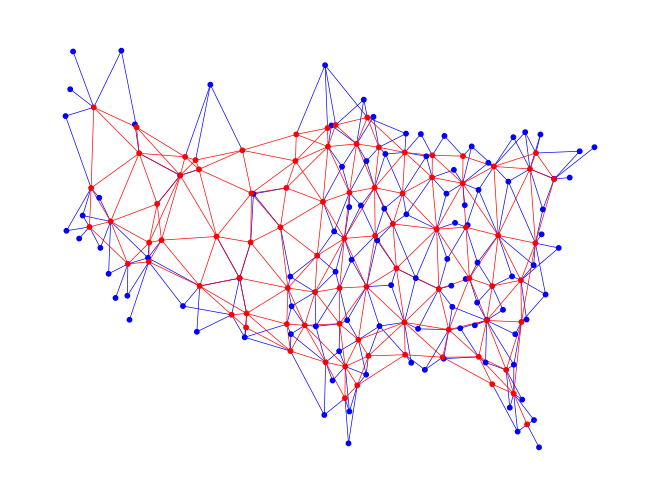

Diameter: 16
Average hop count: 5.821092831962397
Average degree: 5.437837837837838
Average degree of repeaters: 8.541176470588235
Average degree of repeaters edges: 2.623529411764706
Maximum degree of repeater edges: 9
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 81


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 81
max edge distance: 499.9916163104589
max endnode-repeater edge: 499.9571383827868
max repeater-repeater edge: 499.9916163104589
Distance Sum: 125582.12640090536
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


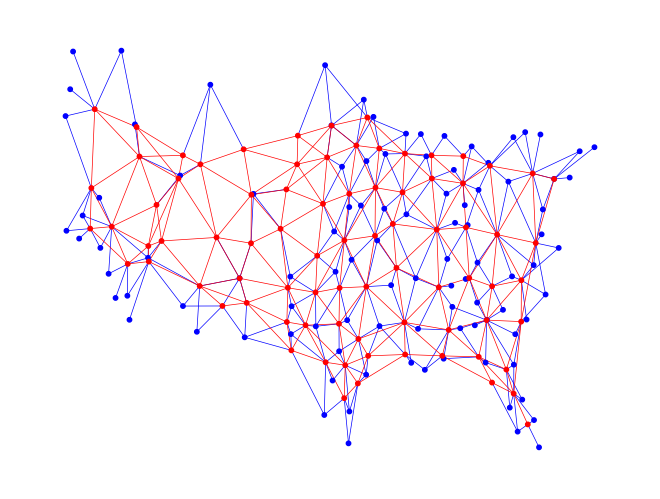

Diameter: 16
Average hop count: 5.798833640270105
Average degree: 5.370165745856354
Average degree of repeaters: 8.604938271604938
Average degree of repeaters edges: 2.6049382716049383
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 77


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 77
max edge distance: 618.5792302278045
max endnode-repeater edge: 618.5792302278045
max repeater-repeater edge: 499.9964265539131
Distance Sum: 122703.13558291038
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


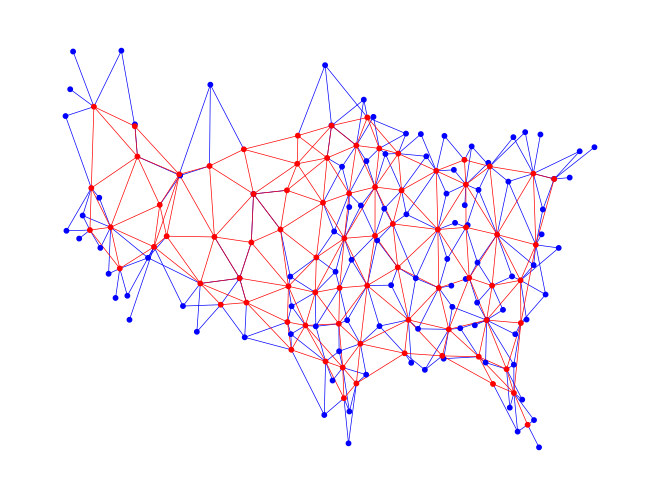

Diameter: 16
Average hop count: 5.783384694401644
Average degree: 5.299435028248587
Average degree of repeaters: 8.662337662337663
Average degree of repeaters edges: 2.5714285714285716
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 73


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 73
max edge distance: 613.9171353740642
max endnode-repeater edge: 613.9171353740642
max repeater-repeater edge: 499.9861279970016
Distance Sum: 119651.36274859506
The number of illegal e-r edges: 2
The number of illegal r-r edges: 0


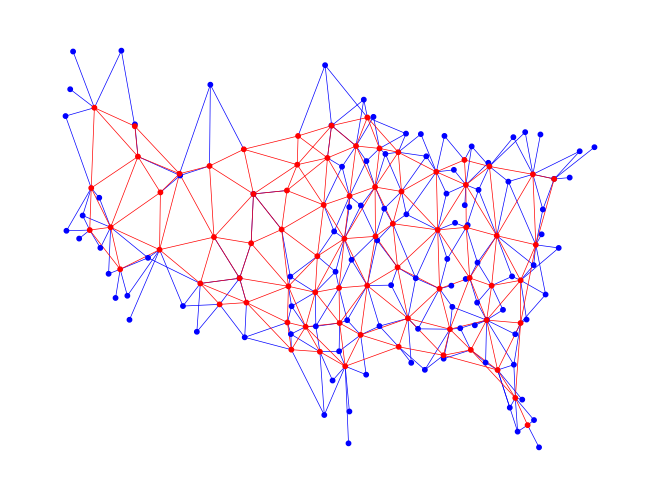

Diameter: 15
Average hop count: 5.657548057534615
Average degree: 5.236994219653179
Average degree of repeaters: 8.767123287671232
Average degree of repeaters edges: 2.5616438356164384
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  4
num_clusters: 69


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 69
max edge distance: 613.9171353740642
max endnode-repeater edge: 613.9171353740642
max repeater-repeater edge: 499.99269501201013
Distance Sum: 116716.35756875809
The number of illegal e-r edges: 2
The number of illegal r-r edges: 0


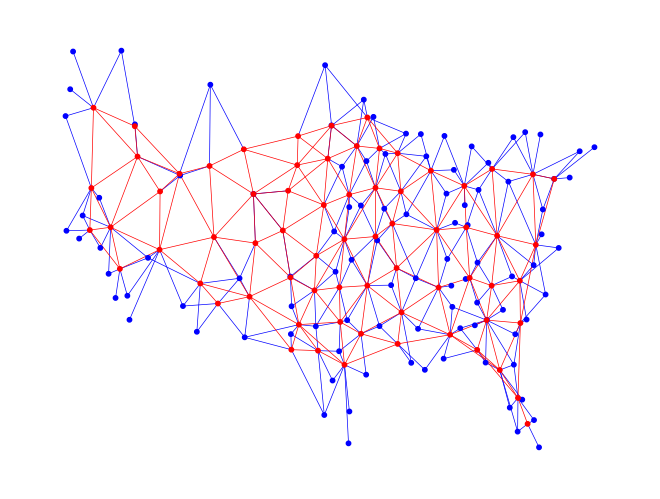

Diameter: 14
Average hop count: 5.4352634544942235
Average degree: 5.14792899408284
Average degree of repeaters: 8.840579710144928
Average degree of repeaters edges: 2.536231884057971
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
re-caculate from num_clusters: 79
num_clusters: 79


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 79
max edge distance: 499.95721306143935
max endnode-repeater edge: 499.95721306143935
max repeater-repeater edge: 499.8409199133271
Distance Sum: 124200.2711586932
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


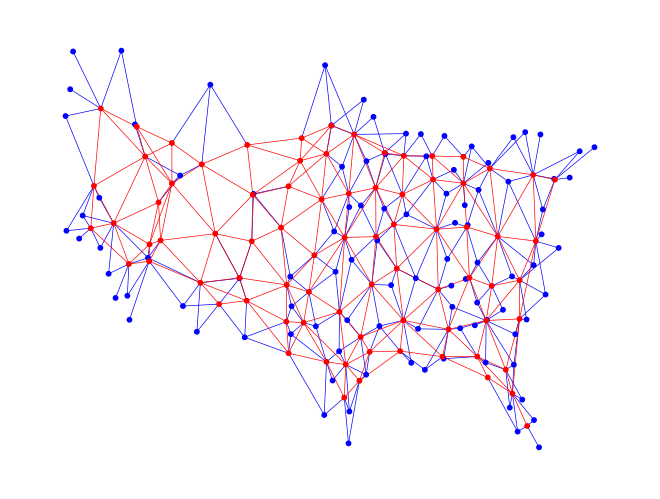

Diameter: 16
Average hop count: 5.793296089385475
Average degree: 5.318435754189944
Average degree of repeaters: 8.620253164556962
Average degree of repeaters edges: 2.5949367088607596
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 77


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 77
max edge distance: 499.98059812397145
max endnode-repeater edge: 499.95721306143946
max repeater-repeater edge: 499.98059812397145
Distance Sum: 122274.4437423279
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


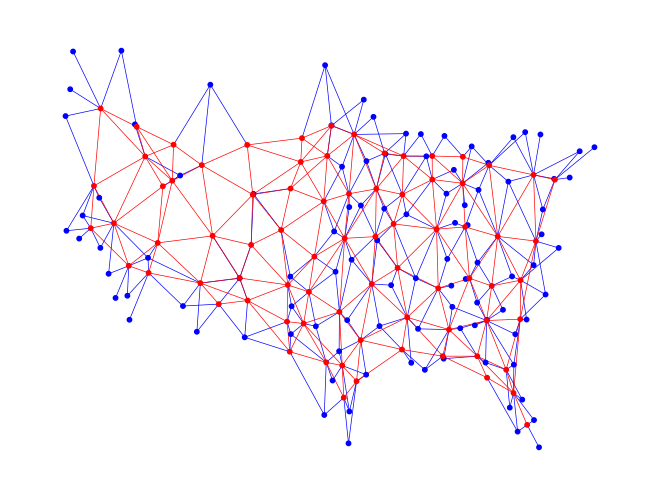

Diameter: 15
Average hop count: 5.760914227015922
Average degree: 5.265536723163842
Average degree of repeaters: 8.623376623376624
Average degree of repeaters edges: 2.5714285714285716
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 75


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 75
max edge distance: 499.95721306143946
max endnode-repeater edge: 499.95721306143946
max repeater-repeater edge: 499.80234776589
Distance Sum: 120900.3088179141
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


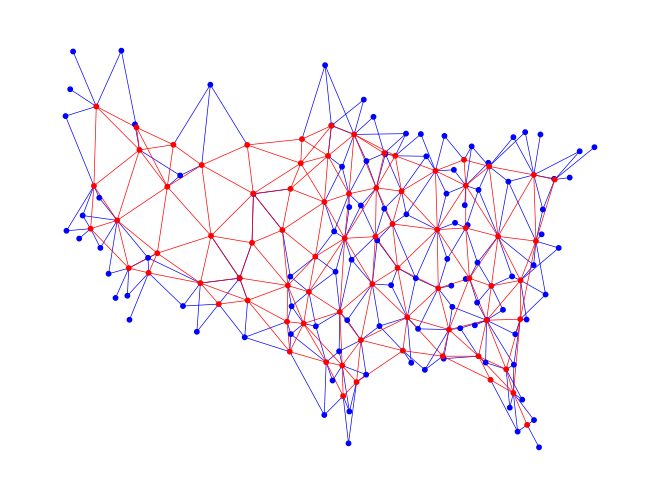

Diameter: 15
Average hop count: 5.748440065681445
Average degree: 5.234285714285714
Average degree of repeaters: 8.666666666666666
Average degree of repeaters edges: 2.56
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 73


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 73
max edge distance: 540.0477817401519
max endnode-repeater edge: 540.0477817401519
max repeater-repeater edge: 499.8615081713862
Distance Sum: 118860.44158425958
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


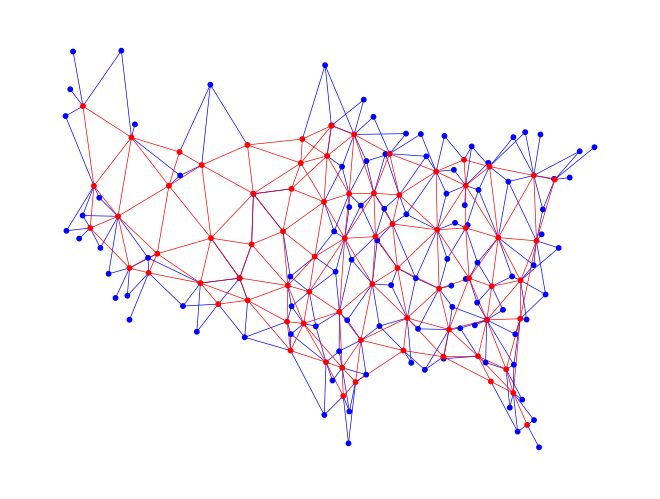

Diameter: 15
Average hop count: 5.733633552896895
Average degree: 5.179190751445087
Average degree of repeaters: 8.67123287671233
Average degree of repeaters edges: 2.5342465753424657
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 71


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 71
max edge distance: 540.0477817401518
max endnode-repeater edge: 540.0477817401518
max repeater-repeater edge: 499.99543845025147
Distance Sum: 117429.01659660914
The number of illegal e-r edges: 2
The number of illegal r-r edges: 0


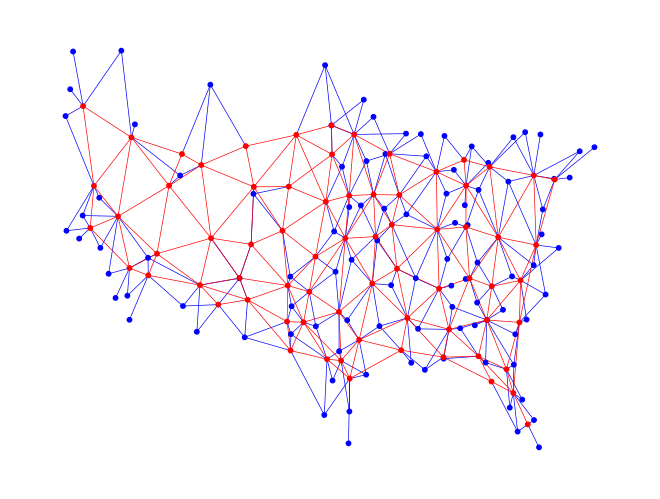

Diameter: 15
Average hop count: 5.704575163398693
Average degree: 5.146198830409356
Average degree of repeaters: 8.71830985915493
Average degree of repeaters edges: 2.5211267605633805
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 69


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 69
max edge distance: 540.0477817401518
max endnode-repeater edge: 540.0477817401518
max repeater-repeater edge: 500.30031397161304
Distance Sum: 116205.26020660186
The number of illegal e-r edges: 1
The number of illegal r-r edges: 1


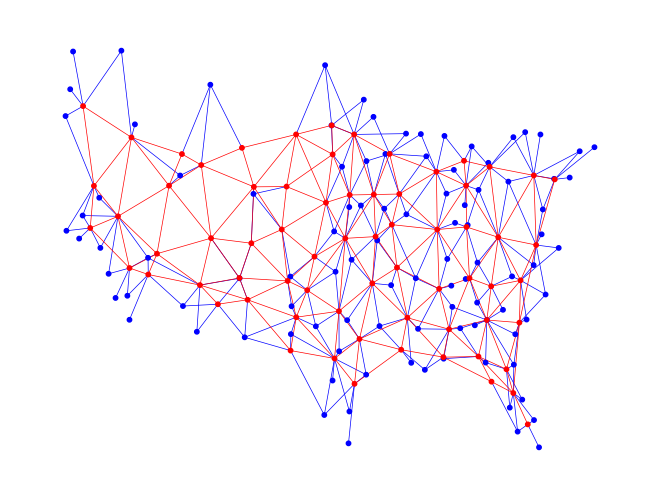

Diameter: 15
Average hop count: 5.619399830938293
Average degree: 5.088757396449704
Average degree of repeaters: 8.73913043478261
Average degree of repeaters edges: 2.5072463768115942
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 67


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 67
max edge distance: 540.0477817401518
max endnode-repeater edge: 540.0477817401518
max repeater-repeater edge: 499.97853776100385
Distance Sum: 114820.98958825532
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


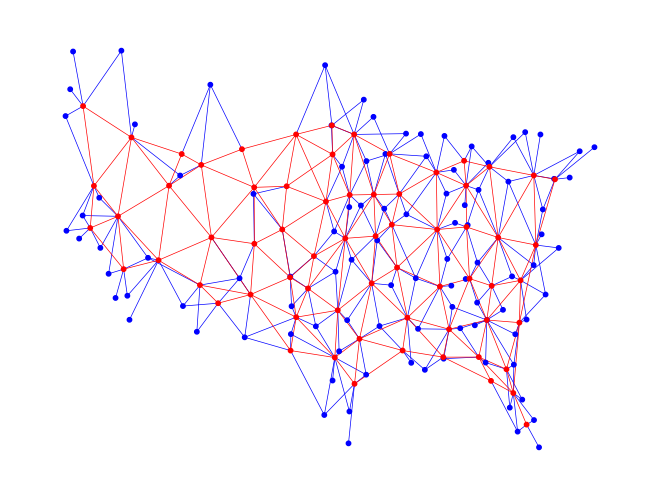

Diameter: 15
Average hop count: 5.56085419522401
Average degree: 5.053892215568863
Average degree of repeaters: 8.791044776119403
Average degree of repeaters edges: 2.4925373134328357
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  2
num_clusters: 65


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 65
max edge distance: 539.9612582551148
max endnode-repeater edge: 539.9612582551148
max repeater-repeater edge: 499.99933001571236
Distance Sum: 113039.84563093196
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


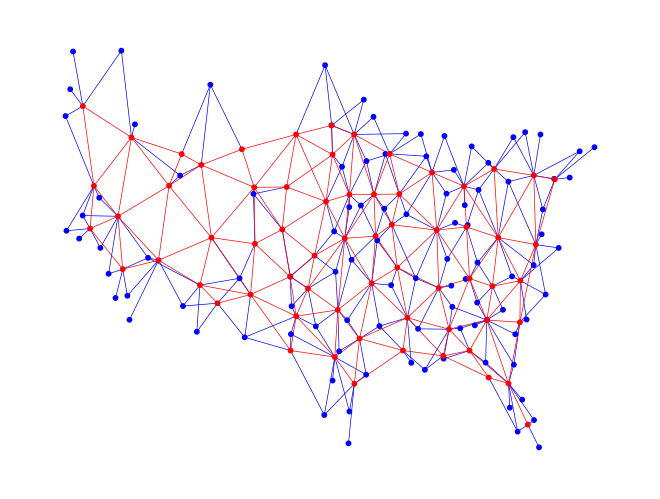

Diameter: 15
Average hop count: 5.5538063562453805
Average degree: 4.993939393939394
Average degree of repeaters: 8.815384615384616
Average degree of repeaters edges: 2.476923076923077
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
re-caculate from num_clusters: 74
num_clusters: 74


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 74
max edge distance: 499.8515264958266
max endnode-repeater edge: 499.4633971244531
max repeater-repeater edge: 499.8515264958266
Distance Sum: 120366.50502664674
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


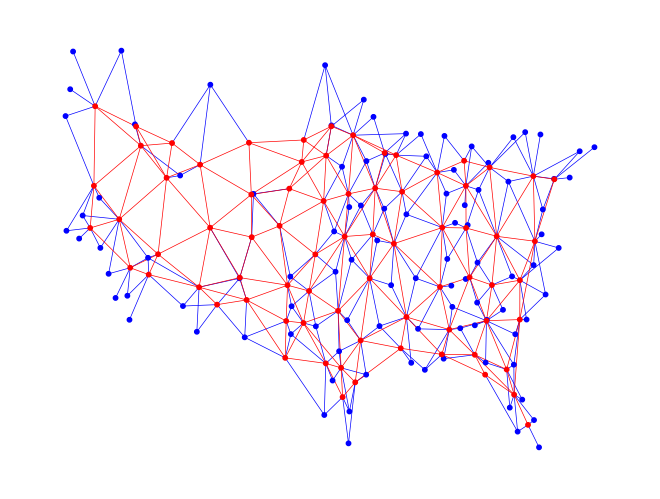

Diameter: 15
Average hop count: 5.743339313002458
Average degree: 5.206896551724138
Average degree of repeaters: 8.675675675675675
Average degree of repeaters edges: 2.554054054054054
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 73


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 73
max edge distance: 499.9865072686228
max endnode-repeater edge: 499.84809617737227
max repeater-repeater edge: 499.9865072686228
Distance Sum: 119560.49049918035
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


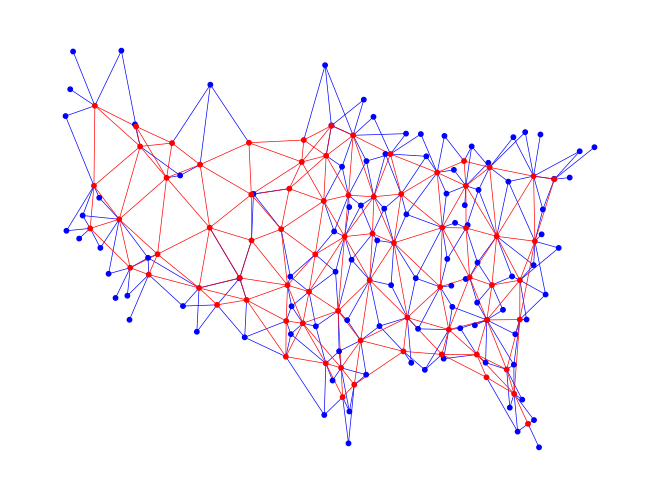

Diameter: 15
Average hop count: 5.748487699959672
Average degree: 5.179190751445087
Average degree of repeaters: 8.684931506849315
Average degree of repeaters edges: 2.547945205479452
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 72


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 72
max edge distance: 517.4361026840845
max endnode-repeater edge: 517.4361026840845
max repeater-repeater edge: 499.99683755216836
Distance Sum: 118251.8528196798
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


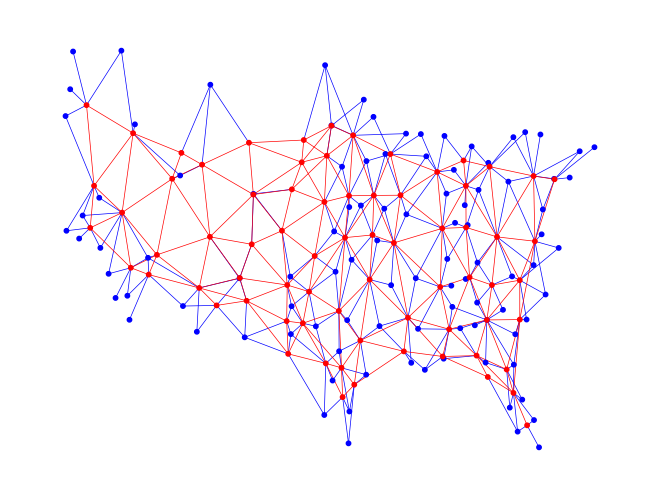

Diameter: 15
Average hop count: 5.730450156398748
Average degree: 5.151162790697675
Average degree of repeaters: 8.680555555555555
Average degree of repeaters edges: 2.5277777777777777
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 71


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 71
max edge distance: 517.4361026840845
max endnode-repeater edge: 517.4361026840845
max repeater-repeater edge: 499.923752391677
Distance Sum: 117635.06842210496
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


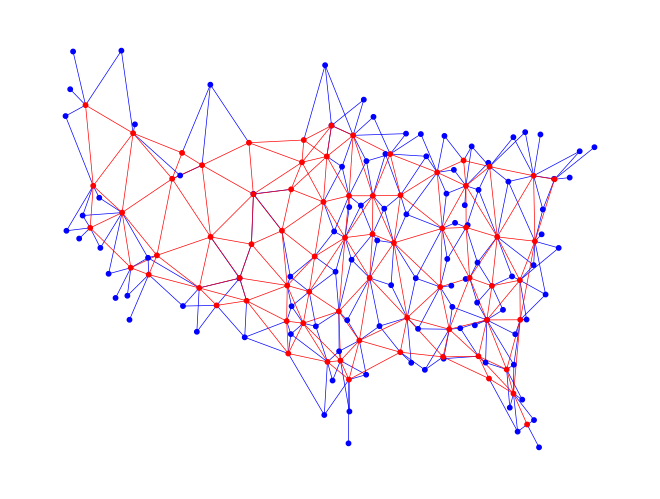

Diameter: 15
Average hop count: 5.69858961128311
Average degree: 5.1345029239766085
Average degree of repeaters: 8.71830985915493
Average degree of repeaters edges: 2.535211267605634
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 70


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 70
max edge distance: 517.3844153127311
max endnode-repeater edge: 517.3844153127311
max repeater-repeater edge: 499.9805810665291
Distance Sum: 116923.4032547642
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


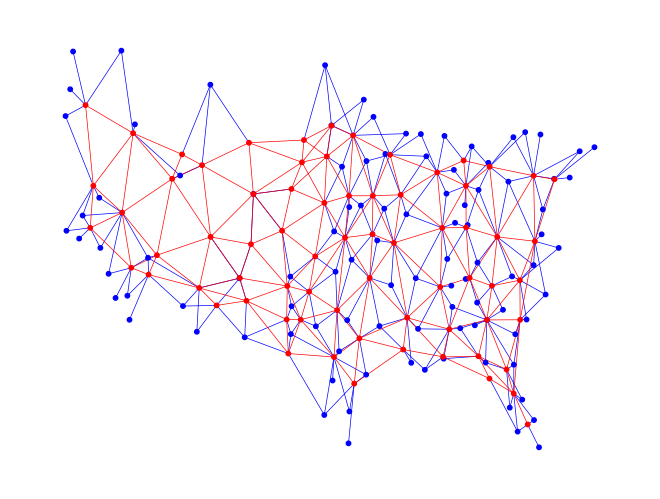

Diameter: 15
Average hop count: 5.638357117995127
Average degree: 5.105882352941176
Average degree of repeaters: 8.728571428571428
Average degree of repeaters edges: 2.5285714285714285
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 69


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 69
max edge distance: 535.3200723592057
max endnode-repeater edge: 535.3200723592057
max repeater-repeater edge: 499.9805810665291
Distance Sum: 115995.9675546338
The number of illegal e-r edges: 2
The number of illegal r-r edges: 0


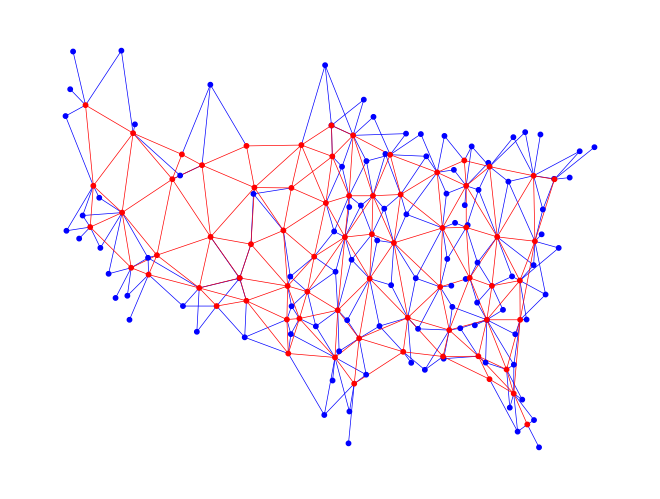

Diameter: 15
Average hop count: 5.64025077486616
Average degree: 5.088757396449704
Average degree of repeaters: 8.73913043478261
Average degree of repeaters edges: 2.5072463768115942
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 68


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 68
max edge distance: 517.2873282782238
max endnode-repeater edge: 517.2873282782238
max repeater-repeater edge: 499.9916853913316
Distance Sum: 115581.67222144383
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


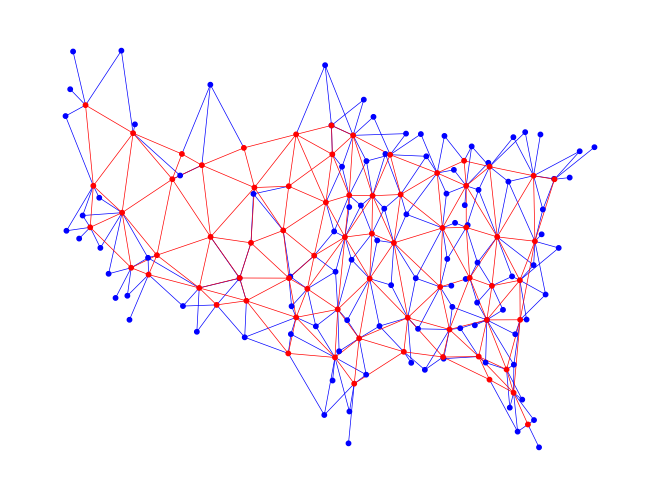

Diameter: 15
Average hop count: 5.613416025092672
Average degree: 5.059523809523809
Average degree of repeaters: 8.75
Average degree of repeaters edges: 2.5
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
current rate:  1
num_clusters: 67


/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/ygan11/gridTest/.conda/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


New reapters number: 67
max edge distance: 517.2873282782238
max endnode-repeater edge: 517.2873282782238
max repeater-repeater edge: 499.9950717164471
Distance Sum: 114932.57697984595
The number of illegal e-r edges: 1
The number of illegal r-r edges: 0


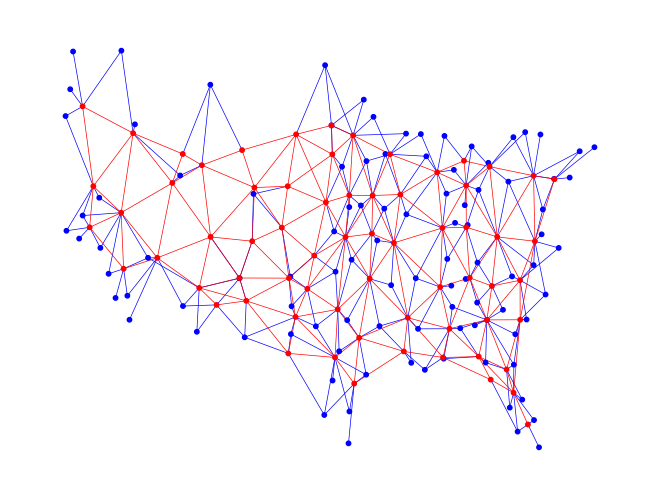

Diameter: 15
Average hop count: 5.598874540076474
Average degree: 5.041916167664671
Average degree of repeaters: 8.776119402985074
Average degree of repeaters edges: 2.4925373134328357
Maximum degree of repeater edges: 8
Minimum degree of repeater edges: 1
final topology:
New reapters number: 73
max edge distance: 499.5698712108294
max endnode-repeater edge: 499.5698712108294
max repeater-repeater edge: 497.0714980438891
Distance Sum: 128743.03826175113
The number of illegal e-r edges: 0
The number of illegal r-r edges: 0


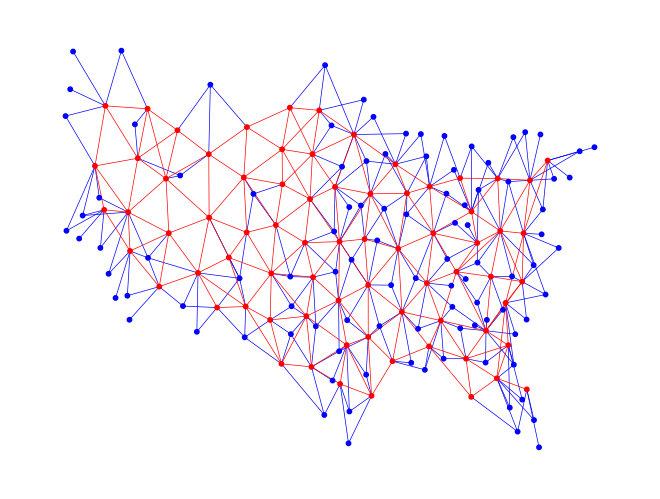

In [4]:
from endnodes_gen import endnode_graph_gen, endnode_graph_gen_different_map_size
from iter_kms_ga import KmsGa
from grid_steiner import construct_steiner_tree
from waxman_topo_gen import construct_waxman
from demand_gen import Demand
import os
topo_num = 1
endnode_nums = [25]#, 25], 50, 200, 400, 800]
endnodes_files = []

# for i in range(topo_num):
#     for endnode_num in endnode_nums:
#         f = endnode_graph_gen(endnode_num, i)
#         endnodes_files.append(f)
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")
from config import map_size
endnode_graph_gen_different_map_size(100, 0, map_size)
file_name = "ustop100-100-0.json"
endnodes_files.append("../dist/endnodes/ustop100-100-0.json")
# endnodes_files.append("../dist/endnodes/endnodesLocs-100-0.json")


# endnodes_files = [f for f in os.listdir("../dist/endnodes/")]# if os.path.isfile(f)]
# endnodes_files = ["../dist/endnodes/" + f for f in endnodes_files]

print (endnodes_files)

for f in endnodes_files:
    d = Demand(f, 300)
    # construct_steiner_tree(f)
    # print ("steiner tree generated for " + f)
    kms = KmsGa(d)
    kms.iterate_kms_ga(f)
    # print ("kms ga generated")
    # construct_waxman(f, degree=5, edge_len=1000)  
    # print ("waxman graph generated for " + f)